<a href="https://colab.research.google.com/github/AnandKhandekar/Markov-Chains-Introduction/blob/master/Intoduction_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Markov chains are an essential component of Markov chain Monte Carlo (MCMC) techniques. Under MCMC, the Markov chain is used to sample from some target distribution. To get a better understanding of what a Markov chain is, and further, how it can be used to sample form a distribution, this post introduces and applies a few basic concepts.

A Markov chain is a stochastic process that operates sequentially (e.g. temporally), transitioning from one state to another within an allowed set of states.
$x^{(0)} \rightarrow x^{(1)} \rightarrow x^{(2)} \dots \rightarrow x^{(t)} \rightarrow \dots$

\\


### **A Markov chain is defined by three elements:**

* A state space $x$, which is a set of values that the chain is allowed to take
* A transition operator $p(x^{(t+1)} | x^{(t)})$ that defines  the probability of moving from state $x^{(t)}$ to $x^{(t+1)}$
* An initial condition distribution $\pi^{(0)}$ which defines the probability of being in any one of the possible states at the initial iteration t = 0.

The Markov chain starts at some initial state, which is sampled from $\pi^{(0)}$, then transitions from one state to another according to the transition operator $p(x^{(t+1)} | x^{(t)}).$

A Markov chain is called **memoryless** if the next state only depends on the current state and not on any of the states previous to the current:
* $p(x^{(t+1)}|x^{(t)},x^{(t-1)},...x^{(0)}) = p(x^{(t+1)}|x^{(t)})$

**(This memoryless property is formally know as the Markov property).**

If the transition operator for a Markov chain does not change across transitions, the Markov chain is called **time homogenous**.  A nice  property of time homogenous Markov chains is that as the chain runs for a long time and $t \rightarrow \infty$, the chain will reach an equilibrium that is called the chain’s **stationary distribution** : 
* $ p(x^{(t+1)} | x^{(t)}) = p(x^{(t)} | x^{(t-1)})$

The stationary distribution of a Markov chain is important for sampling from probability distributions, a technique that is at the heart of Markov Chain Monte Carlo (MCMC) methods.


***
# **Finite state-space (time homogenous) Markov chain**

If the state space of a Markov chain takes on a finite number of distinct values, and it is time homogenous, then the transition operator can be defined by a matrix P, where the entries of P are:
* $p_{ij} = p(X^{(t+1)} = j | x^{(t)} = i)$

This means that if the chain is currently in the i-th state, the transition operator assigns the probability of moving to the  j-th state by the entries of i-th row of P (i.e.  each row of P defines a conditional probability distribution on the state space).


## **Example: Predicting the weather with a finite state-space Markov chain**

 Assume that there are (literally) only 3 types of weather: sunny, foggy, or rainy (this is analogous to a state-space that takes on three discrete values). The weather patterns are very stable there, so a weatherman can easily predict the weather next week based on the weather today with the following transition rules:
If it is sunny today, then

* it is highly likely that it will be sunny next week
$p(X^{(week)}=sunny | X^{(today)}=sunny)=0.8,$

* it is very unlikely that it will be raining next week
$p(X^{(week)}=rainy | X^{(today)}=sunny)=0.05$
* and somewhat likely that it will foggy next week
$p(X^{(week)}=foggy | X^{(today)}=sunny)=0.15$

If it is foggy today then
*  it is somewhat likely that it will be sunny next week
$p(X^{(week)}=sunny | X^{(today)}=foggy)=0.4$
* but slightly less likely that it will be foggy next week
$p(X^{(week)}=foggy | X^{(today)}=foggy)=0.5,$
* and fairly unlikely that it will be raining next week.
$p(X^{(week)}=rainy | X^{(today)}=foggy)=0.1,$

If it is rainy today then

* it is unlikely that it will be sunny next week
$p(X^{(week)}=sunny | X^{(today)}=rainy)=0.1,$
* it is somewhat likely that it will be foggy next week
$p(X^{(week)}=foggy | X^{(today)}=rainy)=0.3,$
* and it is fairly likely that it will be rainy next week
$p(X^{(week)}=rainy | X^{(today)}=rainy)=0.6,$


All of these transition rules can be instantiated in a single 3 x 3 transition operator matrix:

$P = \begin{bmatrix} 0.8 & 0.15 & 0.05\\ 0.4 & 0.5 & 0.1\\ 0.1& 0.3 & 0.6 \end{bmatrix} $

Where each row of $P$ corresponds to the weather at iteration t (today), and each column corresponds to the weather the next week. Let’s say that it is rainy today, what is the probability it will be sunny next week, in two weeks, or in 6 months? We can answer these questions by running a Markov chain from the initial state of “rainy,” transitioning according to $P.$

In [0]:
#FINITE STATE-SPACE MARKOV CHAIN EXAMPLE
 
# TRANSITION OPERATOR
#     S  F  R
#     U  O  A
#     N  G  I
#     N  G  N
#     Y  Y  Y
import numpy as np
import matplotlib.pyplot as plt

P =[ [ 0.8 , 0.15,  0.5] ,   # SUNNY
         [0.4 ,  0.5,   0.1 ],   # FIGGY
         [0.1,   0.3  ,  0.6 ]]   # RAINY

p=[[0.8,0.15,0.05],[0.4,0.5,0.1],[0.1,0.3,0.6]]
nWeeks=25
x=np.zeros((nWeeks,3))
x[0]=[0,0,1]

for i in range(nWeeks-1):
  x[i+1]=x[i].dot(p)
print(x)



# Printing the output 


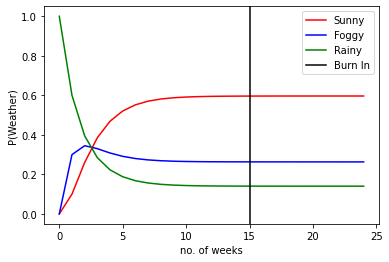

In [57]:
plt.figure()
plt.plot(np.arange(nWeeks),x[:,0],color='red')
plt.plot(np.arange(nWeeks),x[:,1],color='blue')
plt.plot(np.arange(nWeeks),x[:,2],color='green')
plt.axvline(15, color="black", zorder=10,label='BurnIN')
plt.xlabel('no. of weeks')
plt.ylabel('P(Weather)')
plt.legend(['Sunny','Foggy','Rainy','Burn In'])
plt.show()

# **Continuous state-space Markov chains**

A Markov chain can also have a continuous state space that exists in the real numbers $x \in \mathbb{R}^N.$ In this case the transition operator cannot be instantiated simply as a matrix, but is instead some continuous function on the real numbers. Note that the continuous state-space Markov chain also has a burn in period and a stationary distribution. However, the stationary distribution will also be over a continuous set of variables. To get a better understanding of the workings of a continuous state-space Markov chain, let’s look at a simple example.

***
## **Example: Sampling from a continuous distribution using continuous state-space Markov chains**

We can use the stationary distribution of a continuous state-space Markov chain in order to sample from a continuous probability distribution: we  run a Markov chain for a sufficient amount of time **NOTE**so that it has reached its stationary distribution, then keep the states that the chain visits as samples from that stationary distribution.


**NOTE :** By time homogeneity, whenever the process enters state i, the way it evolves probabilistically from that point is the same as if the process started in state $i$ at time 0. When the process enters state $i$, the time it spends there before it leaves state i is called the holding time
in state $i$. By time homogeneity, we can speak of the holding time distribution because it is the same every time the process enters state $i$. 

Let $Ti$ denote the holding time in state i.  Proposition: $Ti$
is exponentially distributed.

By time homogeneity, every time our continuous-time Markov chain
leaves state i,
* the number of states it could possibly jump to must stay the same,
and we can let ni denote this number.
* the set of states it could possibly jump to must stay the same,
and we can let ${j1, . . . , jni}$ denote this set of states.
* the probability of going to state $j_{n}{}$ must stay the same, and we can let denote this probability, for ` = 1, . . . , ni
.


**Procedure :** In the following example we define a continuous state-space Markov chain. The transition operator is a **Normal distribution** with unit variance and a mean that is half the distance between zero and the previous state, and the distribution over initial conditions is a Normal distribution with zero mean and unit variance.

To ensure that the chain has moved sufficiently far from the initial conditions and that we are sampling  from the chain’s stationary distribution,  we will choose to throw away the first 50 burn in states of the chain. We can also run multiple chains simultaneously in order to sample the stationary distribution more densely. Here we choose to run 5 chains simultaneously.

In [0]:
import numpy as np
import matplotlib.pyplot as plt


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Markov Chain Samples')

<Figure size 432x288 with 0 Axes>

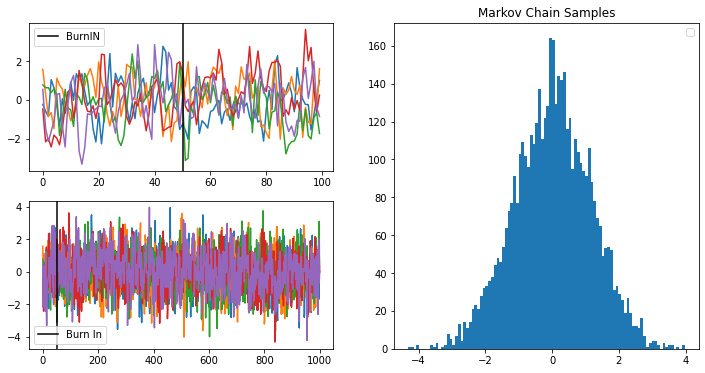

In [93]:
# EXAMPLE OF CONTINUOUS STATE-SPACE MARKOV CHAIN
# Initialize
np.random.seed(42)
nBurnin = 50  # BURNIN
nChains = 5 # MARKOV CHAINS

# DEFINE TRANSITION OPERATOR
P = lambda x, nChains : np.random.normal(0.5*x,1,(1,nChains))
nTransitions = 1000
x = np.zeros((nTransitions,nChains))
x[0,:] =np.random.normal(0,1,(1,nChains))

# RUN THE CHAINS
for i in range(nTransitions-1):
    x[i,:] = P(x[i-1],nChains)
    
# DISPLAY the BURNIN
plt.figure()
fig= plt.figure(figsize=(12,6))
plt.subplot(221)
plt.plot(x[0:100,:])
plt.axvline(nBurnin, color="black", zorder=10,label='BurnIN')
plt.legend()
# DISPLAY THE ENTIRE MARKOV CHAIN
plt.subplot(223)
plt.plot(x)
plt.axvline(nBurnin,color='black',label='Burn In')
plt.legend()

# DISPLAY SAMPLES FROM STATIONARY DISTRIBUTION
samples = x[nBurnin+1:1000,:]
plt.subplot(122)

counts,bins=np.histogram(samples,100)
#b=plt.bar(bins,counts)
plt.hist(bins[:-1], bins, weights=counts)
plt.legend()
plt.title('Markov Chain Samples')

n the upper left panel of the code output we see a close up of the first 100 of the 1000 transitions made by the 5 simultaneous Markov chains; the burn in cutoff is marked by the black line. In the lower left panel we see the entire sequence of transitions for the Markov chains. In the right panel, we can tell from the sampled states that the stationary distribution for this chain is a Normal distribution, with mean equal to zero, and a variance equal to 1.3.

# **End Note**
In the continuous example we were able to deduce the stationary distribution of the Markov chain by looking at the samples generated from the chain after the burn in period. However, **in order to use Markov chains to sample from a specific target distribution, we have to design the transition operator such that the resulting chain reaches a stationary distribution that matches the target distribution. This is where MCMC methods like the Metropolis sampler, the Metropolis-Hastings sampler, and the Gibbs sampler come to rescue.**